In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import poisson
import matplotlib
import matplotlib.pyplot as plt
import re
import math
%matplotlib inline
from matplotlib.axes import Axes
import seaborn as sns
import array as arr
from scipy import stats
import krippendorff

Intercoder Reliability (ICR)

Retrieving data from 'ICR_Data.csv' file with coded responses of Coders 1 and 2 and creating a function to calculate ICR scores (Krippendorff's alpha)

In [2]:
intercoder_data = pd.read_csv('/Users/salmankhawar/Desktop/UvA Courses/Thesis/Content Analysis/ICR_Data.csv')

In [3]:
intercoder_data_cleaned = intercoder_data[2:][['[coder]','[tweet_ID]','[news_outlet]','[tweet_topic] ','[hyperbolic_feature]','[slang_feature]','[listicle_feature]','[emoji_feature]','[hashtag_feature]','[cap_feature]','[punct_feature]','[forw_ref_feature]','[question_feature]','[media_feature]']]

In [4]:
cols = intercoder_data_cleaned.columns
intercoder_data_cleaned[cols] = intercoder_data_cleaned[cols].apply(pd.to_numeric, errors='coerce')

In [5]:
def ICR_score(column):
    coder1 = intercoder_data_cleaned.loc[(intercoder_data_cleaned["[coder]"] == 1), column]
    coder2 = intercoder_data_cleaned.loc[(intercoder_data_cleaned["[coder]"] == 2), column]
    array = [coder1, coder2]
    return krippendorff.alpha(array)

Calcuating ICR scores for individual variables

In [6]:
ICR_score('[news_outlet]')

0.9513953882218716

In [7]:
ICR_score('[tweet_topic] ')

0.7240888102957068

In [8]:
ICR_score('[hyperbolic_feature]')

0.6927775781530723

In [9]:
ICR_score('[slang_feature]')

0.7437499999999999

In [10]:
ICR_score('[listicle_feature]')

1.0

In [11]:
ICR_score('[emoji_feature]')

1.0

In [12]:
ICR_score('[hashtag_feature]')

0.9487870619946092

In [13]:
ICR_score('[cap_feature]')

1.0

In [14]:
ICR_score('[punct_feature]')

0.9058089924515917

In [15]:
ICR_score('[forw_ref_feature]')

0.7612596553773024

In [16]:
ICR_score('[question_feature]')

0.846441947565543

In [17]:
ICR_score('[media_feature]')

0.9057670920934173

Analyzing Manual Content Analysis Results.

Reading CSV file with manual content analysis results,retreiving engagement metrics from the sample file and joining them with the results dataframe.

In [18]:
CA_results = pd.read_csv('/Users/salmankhawar/Desktop/UvA Courses/Thesis/Content Analysis/Results_CA.csv')

In [19]:
manualCA_sample = pd.read_csv('/Users/salmankhawar/Desktop/UvA Courses/Thesis/Data_Collection_Twitter/Data_csv/Data_Collected_Tweepy/ManualCA_sample.csv')

In [20]:
engagement_metrics = manualCA_sample[['favorite_count','retweet_count','is_retweet','twitter_account']]

In [21]:
CA_results = CA_results.join(engagement_metrics)

In [29]:
CA_results.head()

,Unnamed: 0.1.1,[tweet_ID],StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,...,[hashtag_feature],[cap_feature],[punct_feature],[forw_ref_feature],[question_feature],[media_feature],favorite_count,retweet_count,is_retweet,twitter_account
0,0.0,1351933244179152904,2021-12-10 11:39:07,2021-12-10 11:42:07,0,84.84.82.135,100,179,1,2021-12-10 11:42:07,...,0,0,0,0,0,0,12,3,No,BuzzFeed Politics
1,1.0,1309828834691350529,2021-12-10 11:42:39,2021-12-10 11:44:07,0,84.84.82.135,100,87,1,2021-12-10 11:44:07,...,0,0,0,0,0,0,0,1,No,L.A. Times Politics
2,2.0,1006560210029305856,2021-12-10 11:46:35,2021-12-10 11:48:15,0,84.84.82.135,100,99,1,2021-12-10 11:48:15,...,0,0,0,0,1,1,0,1,No,HuffPost Sports
3,3.0,1422561643213426692,2021-12-10 11:48:55,2021-12-10 11:52:04,0,84.84.82.135,100,188,1,2021-12-10 11:52:04,...,0,0,0,0,0,0,1,3,No,USA TODAY Politics
4,4.0,1465819596162678787,2021-12-10 11:52:10,2021-12-10 11:57:00,0,84.84.82.135,100,289,1,2021-12-10 11:57:00,...,0,0,0,0,0,1,0,32,Yes,L.A. Times Sports


Calculating detection rates for each sensationalist feature (1=feature present, 0=feature not present)

In [30]:
CA_results['[hyperbolic_feature]'].value_counts(normalize=True)*100

0    89.930556
1    10.069444
Name: [hyperbolic_feature], dtype: float64

In [31]:
CA_results['[slang_feature]'].value_counts(normalize=True)*100

0    94.166667
1     5.833333
Name: [slang_feature], dtype: float64

In [32]:
CA_results['[listicle_feature]'].value_counts(normalize=True)*100

0    99.097222
1     0.902778
Name: [listicle_feature], dtype: float64

In [33]:
CA_results['[emoji_feature]'].value_counts(normalize=True)*100

0    95.763889
1     4.236111
Name: [emoji_feature], dtype: float64

In [34]:
CA_results['[hashtag_feature]'].value_counts(normalize=True)*100

0    91.527778
1     8.472222
Name: [hashtag_feature], dtype: float64

In [35]:
CA_results['[cap_feature]'].value_counts(normalize=True)*100

0    96.944444
1     3.055556
Name: [cap_feature], dtype: float64

In [36]:
CA_results['[punct_feature]'].value_counts(normalize=True)*100

0    97.430556
1     2.569444
Name: [punct_feature], dtype: float64

In [37]:
CA_results['[forw_ref_feature]'].value_counts(normalize=True)*100

0    95.833333
1     4.166667
Name: [forw_ref_feature], dtype: float64

In [38]:
CA_results['[question_feature]'].value_counts(normalize=True)*100

0    94.444444
1     5.555556
Name: [question_feature], dtype: float64

In [39]:
CA_results['[media_feature]'].value_counts(normalize=True)*100

0    79.791667
1    13.680556
2     5.208333
3     1.319444
Name: [media_feature], dtype: float64

In [40]:
def media_feature(x):
               if x == 0:
                        return 0
               else:
                        return 1

In [41]:
CA_results['[media_dummy]'] = CA_results['[media_feature]'].apply(media_feature) 

In [42]:
CA_results['[media_dummy]'].value_counts(normalize=True)*100

0    79.791667
1    20.208333
Name: [media_dummy], dtype: float64

Creating dummy variable for presence of sensationalism in tweets (1=sensationalist feature present, 0=sensationalist feature not present)

In [43]:
CA_features_grid = CA_results[['[hyperbolic_feature]', '[slang_feature]', '[listicle_feature]', '[emoji_feature]', '[question_feature]', '[hashtag_feature]', '[forw_ref_feature]', '[punct_feature]', '[cap_feature]', '[media_dummy]']].apply(pd.to_numeric)

In [44]:
CA_features_grid = np.array(CA_features_grid)

In [45]:
CA_features_grid = CA_features_grid.tolist()

In [46]:
CAcombined_features_dummy = [int(any(row)) for row in CA_features_grid]

In [47]:
CAcombined_features_dummy[:20]

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]

In [48]:
CA_results['combined_features_dummy'] = CAcombined_features_dummy

Sensationalist feature present in 44.03% of tweets in sample

In [49]:
CA_results['combined_features_dummy'].value_counts(normalize=True)*100

0    55.972222
1    44.027778
Name: combined_features_dummy, dtype: float64

Creating count variable with number of features in each tweet

In [50]:
count_variable = np.sum(CA_features_grid ,axis=1).tolist()

In [51]:
CA_results['count_variable'] = count_variable

Creating variable for outlet type (1=tweets published by online-native outlets, 0=tweets published by legacy outlets)

In [52]:
def news_outlet_classifications(number):
    number = str(number)
    if re.search(r"\b[1-6]\b", number):
        return 1
    else:
        return 0

In [53]:
CA_results['outlet_type'] = CA_results['[news_outlet]'].apply(news_outlet_classifications) 

In [54]:
CA_results['outlet_type'].value_counts(normalize=True)*100

1    50.0
0    50.0
Name: outlet_type, dtype: float64

Creating variable for channel type (1=tweets published in soft news sub-channels i.e sports,entertainment/life, 0=tweets published in hard news sub-channels i.e politics)

In [56]:
def channel_classification(number):
    number = str(number)
    if re.search(r"\b[147][0]?\b", number):
        return 0
    else:
        return 1

In [57]:
CA_results['channel_type'] = CA_results['[news_outlet]'].apply(channel_classification) 

In [58]:
CA_results['channel_type'].value_counts(normalize=True)*100

1    50.069444
0    49.930556
Name: channel_type, dtype: float64

Creating dummy variable for topic type

(1=tweets classified as 'entertainment/celebrity news','lifestyle and society ','sports','crime/law and order','human-interest story',

0=tweets classified as 'politics/government affairs/military','international affairs','economy/business','health/education' and 'science/technology')

In [59]:
def topic_type(x):
    if x in [6,7,8,9,10]:
        return 1
    else:
        return 0

In [60]:
CA_results['topic_type'] = CA_results['[tweet_topic]'].apply(topic_type) 

In [61]:
CA_results['topic_type'].value_counts(normalize=True)*100

1    54.791667
0    45.208333
Name: topic_type, dtype: float64

Creating dummy variables for indiviudal topic categories

In [63]:
topic_dummies = pd.get_dummies(CA_results['[tweet_topic]'])

In [64]:
CA_results['politics/government affairs/military'] = topic_dummies[1]
CA_results['international affairs'] = topic_dummies[2]
CA_results['economy/business'] = topic_dummies[3]
CA_results['health/education'] = topic_dummies[4]
CA_results['science/technology'] = topic_dummies[5]
CA_results['entertainment/celebrity news'] = topic_dummies[6]
CA_results['lifestyle and society'] = topic_dummies[7]
CA_results['sports'] = topic_dummies[8]
CA_results['crime/law and order'] = topic_dummies[9]
CA_results['human-interest story'] = topic_dummies[10]
CA_results['other'] = topic_dummies[11]

Creating variable for length of tweets, after removing urls present in tweet texts

In [65]:
def remove_urls(df):
    url_removed =[]
    for text in df['text']:
            text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
            url_removed.append(text)

    df['text'] = url_removed

In [66]:
remove_urls(manualCA_sample)

In [67]:
def length_tweet(x):
    return len(x)

In [68]:
CA_results['len_tweet'] = manualCA_sample['text'].apply(length_tweet)

Testing H1

Running Logistic Regression using dummy variable for presence of sensationalist feature/s in tweets as DV and outlet type(main variable of interest), channel type, topic type, and tweet length as IVs (Table B1)

In [69]:
featuresH1 = ['outlet_type','channel_type', 'topic_type', 'len_tweet']

In [70]:
logit_model = sm.Logit(CA_results['combined_features_dummy'], sm.add_constant(CA_results[featuresH1]))
reg_model_H1a = logit_model.fit()
print(reg_model_H1a.summary())

Optimization terminated successfully.
         Current function value: 0.586266
         Iterations 5
                              Logit Regression Results                             
Dep. Variable:     combined_features_dummy   No. Observations:                 1440
Model:                               Logit   Df Residuals:                     1435
Method:                                MLE   Df Model:                            4
Date:                     Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1454
Time:                             22:26:49   Log-Likelihood:                -844.22
converged:                            True   LL-Null:                       -987.84
Covariance Type:                 nonrobust   LLR p-value:                 6.170e-61
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9217      0.191    -10.053      0.000      -2

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Running Poisson Regression using count variable for number of sensationalist features in tweets as DV and outlet type(main variable of interest), channel type, topic type, and tweet length as IVs (Table B1)

In [73]:
poisson_model = sm.Poisson(CA_results['count_variable'], sm.add_constant(CA_results[featuresH1]))
poiss_model_H1b = poisson_model.fit()                        
print (poiss_model_H1b.summary())

Optimization terminated successfully.
         Current function value: 0.955935
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:         count_variable   No. Observations:                 1440
Model:                        Poisson   Df Residuals:                     1435
Method:                           MLE   Df Model:                            4
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1330
Time:                        22:30:44   Log-Likelihood:                -1376.5
converged:                       True   LL-Null:                       -1587.8
Covariance Type:            nonrobust   LLR p-value:                 3.876e-90
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.9802      0.123    -16.155      0.000      -2.220      -1.740
outlet_type      0.4551

Testing H2

Running Poisson Regression using favorite count as DV and number of sensationalist feature/s (main variable of interest), outlet type, channel type, topic type, and tweet length as IVs (Table C1)

In [74]:
featuresH2a = ['count_variable','channel_type','topic_type','outlet_type','len_tweet']

In [75]:
poisson_model2a = sm.Poisson(CA_results['favorite_count'], sm.add_constant(CA_results[featuresH2a]))
poiss_model_H2a = poisson_model2a.fit()                        
print (poiss_model_H2a.summary())

Optimization terminated successfully.
         Current function value: 26.661863
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:         favorite_count   No. Observations:                 1440
Model:                        Poisson   Df Residuals:                     1434
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                 0.07437
Time:                        22:37:37   Log-Likelihood:                -38393.
converged:                       True   LL-Null:                       -41478.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2442      0.026     47.923      0.000       1.193       1.295
count_variable  

Running Poisson Regression using retweet count as DV and number of sensationalist feature/s (main variable of interest), outlet type, channel type, topic type, and tweet length as IVs (Table C1)

In [76]:
poisson_model2b = sm.Poisson(CA_results['retweet_count'], sm.add_constant(CA_results[featuresH2a]))
poiss_model_H2b = poisson_model2b.fit()                        
print (poiss_model_H2b.summary())

Optimization terminated successfully.
         Current function value: 42.095041
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:          retweet_count   No. Observations:                 1440
Model:                        Poisson   Df Residuals:                     1434
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1468
Time:                        22:39:19   Log-Likelihood:                -60617.
converged:                       True   LL-Null:                       -71046.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3926      0.027     52.525      0.000       1.341       1.445
count_variable  

Running Poisson Regression using favorite count as DV and presence of sensationalist feature/s (main variable of interest), outlet type, channel type, topic type, and tweet length as IVs (Table C2)

In [77]:
featuresH2b = ['combined_features_dummy','channel_type','topic_type','outlet_type','len_tweet']

In [79]:
poisson_model2c = sm.Poisson(CA_results['favorite_count'], sm.add_constant(CA_results[featuresH2b]))
poiss_model_H2c = poisson_model2c.fit()                        
print (poiss_model_H2c.summary())

Optimization terminated successfully.
         Current function value: 26.940053
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:         favorite_count   No. Observations:                 1440
Model:                        Poisson   Df Residuals:                     1434
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                 0.06471
Time:                        22:49:04   Log-Likelihood:                -38794.
converged:                       True   LL-Null:                       -41478.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.1494      0.026     43.635      0.000       1.098  

Running Poisson Regression using retweet count as DV and presence of sensationalist feature/s (main variable of interest), outlet type, channel type, topic type, and tweet length as IVs (Table C2)

In [81]:
poisson_model2d = sm.Poisson(CA_results['retweet_count'], sm.add_constant(CA_results[featuresH2b]))
poiss_model_H2d = poisson_model2d.fit()                        
print (poiss_model_H2d.summary())

Optimization terminated successfully.
         Current function value: 41.926246
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:          retweet_count   No. Observations:                 1440
Model:                        Poisson   Df Residuals:                     1434
Method:                           MLE   Df Model:                            5
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1502
Time:                        22:51:18   Log-Likelihood:                -60374.
converged:                       True   LL-Null:                       -71046.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.4013      0.027     52.672      0.000       1.349  

Running Poisson Regression using favorite count as DV and individual sensationalist features as IVs controlling for outlet type, channel type, topic type, and tweet length (Table C3)

In [82]:
featuresH2c = ['[hyperbolic_feature]', '[slang_feature]', '[listicle_feature]', '[emoji_feature]', '[question_feature]', '[hashtag_feature]', '[forw_ref_feature]', '[punct_feature]', '[cap_feature]', '[media_dummy]','channel_type','topic_type','outlet_type','len_tweet']

In [83]:
poisson_model2e = sm.Poisson(CA_results['favorite_count'], sm.add_constant(CA_results[featuresH2c]))
poiss_model_H2e = poisson_model2e.fit()                        
print (poiss_model_H2e.summary())

Optimization terminated successfully.
         Current function value: 25.038853
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:         favorite_count   No. Observations:                 1440
Model:                        Poisson   Df Residuals:                     1425
Method:                           MLE   Df Model:                           14
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1307
Time:                        22:57:30   Log-Likelihood:                -36056.
converged:                       True   LL-Null:                       -41478.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1780      0.027     44.022      0.000       1.126       1.23

Running Poisson Regression using retweet count as DV and individual sensationalist features as IVs controlling for outlet type, channel type, topic type, and tweet length (Table C3)

In [84]:
poisson_model2f = sm.Poisson(CA_results['retweet_count'], sm.add_constant(CA_results[featuresH2c]))
poiss_model_H2f = poisson_model2f.fit()                        
print (poiss_model_H2f.summary())

Optimization terminated successfully.
         Current function value: 40.502319
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:          retweet_count   No. Observations:                 1440
Model:                        Poisson   Df Residuals:                     1425
Method:                           MLE   Df Model:                           14
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1791
Time:                        22:58:06   Log-Likelihood:                -58323.
converged:                       True   LL-Null:                       -71046.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5075      0.026     57.193      0.000       1.456       1.55

Exploratory Analysis

Running Logistic Regression using presence of sensationalism as DV and entertainment-oriented topics as IVs controlling for outlet type, channel type, and tweet length (Table D1)

In [85]:
featuresD = ['entertainment/celebrity news','lifestyle and society','sports','human-interest story', 'crime/law and order', 'channel_type','outlet_type','len_tweet']

In [86]:
logit_model_top = sm.Logit(CA_results['combined_features_dummy'], sm.add_constant(CA_results[featuresD]))
reg_model_top = logit_model_top.fit()
print(reg_model_top.summary())

Optimization terminated successfully.
         Current function value: 0.572772
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     combined_features_dummy   No. Observations:                 1440
Model:                               Logit   Df Residuals:                     1431
Method:                                MLE   Df Model:                            8
Date:                     Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1651
Time:                             23:23:19   Log-Likelihood:                -824.79
converged:                            True   LL-Null:                       -987.84
Covariance Type:                 nonrobust   LLR p-value:                 1.142e-65
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           

Running Poisson Regression using presence of sensationalism as DV and entertainment-oriented topics as IVs controlling for outlet type, channel type, and tweet length (Table D1)

In [87]:
poiss_model_top = sm.Poisson(CA_results['count_variable'], sm.add_constant(CA_results[featuresD]))
poiss_model_top = poiss_model_top.fit()
print(poiss_model_top.summary())

Optimization terminated successfully.
         Current function value: 0.939805
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:         count_variable   No. Observations:                 1440
Model:                        Poisson   Df Residuals:                     1431
Method:                           MLE   Df Model:                            8
Date:                Mon, 18 Dec 2023   Pseudo R-squ.:                  0.1477
Time:                        23:24:04   Log-Likelihood:                -1353.3
converged:                       True   LL-Null:                       -1587.8
Covariance Type:            nonrobust   LLR p-value:                 3.251e-96
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.0185      0.122    -16.509      0.000

Visualizations

Plotting frequency distribution of number of sensationalist features (Figure 1)

In [88]:
CA_results['count_variable'].value_counts(normalize=True)*100

0    55.972222
1    28.611111
2    10.902778
3     3.611111
4     0.694444
5     0.208333
Name: count_variable, dtype: float64

<Figure size 432x288 with 0 Axes>

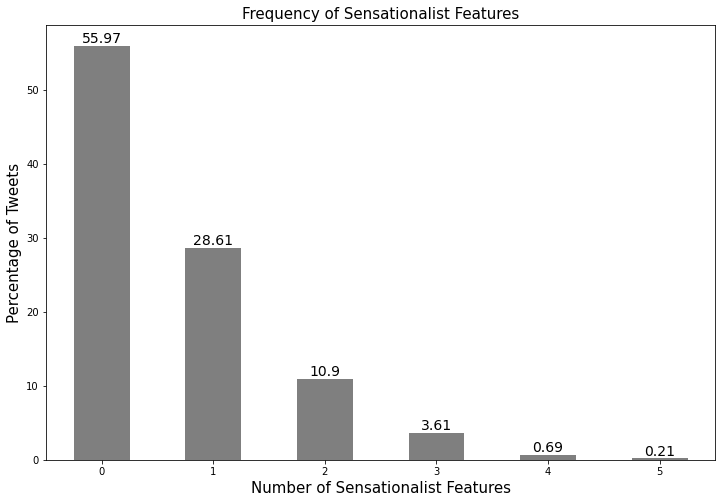

In [89]:
#x-axis
features = [0,1,2,3,4,5]

#y-axis
frequency = [55.97,28.61,10.90,3.61,0.69,0.21]

frequency_series = pd.Series(frequency)

x_labels = [0,1,2,3,4,5]


fig = plt.figure()

# Plotting the bar chart

plt.figure(figsize=(12, 8))
plt.xlabel("Number of Sensationalist Features",fontsize=15)
plt.ylabel("Percentage of Tweets",fontsize=15)
plt.title("Frequency of Sensationalist Features", fontsize=15)
fig = frequency_series.plot(kind='bar', color='#7F7F7F')
fig.set_xticklabels(x_labels,rotation=0)
fig.bar_label(fig.containers[0], label_type='edge',fontsize=14)


plt.savefig("/Users/salmankhawar/Desktop/Thesis Publication/Paper Revisions/Frequency_Sensationalist.jpg", dpi = 300)
#plt.show()

Presence of sensationalism in tweets by outlet type - legacy and online-native (Figure 2)

In [90]:
len(CA_results.loc[(CA_results['outlet_type'] == 1) & (CA_results['combined_features_dummy'] == 1)])/(len(CA_results.loc[(CA_results['outlet_type'] == 1)])) * 100

51.94444444444445

In [91]:
len(CA_results.loc[(CA_results['outlet_type'] == 0) & (CA_results['combined_features_dummy'] == 1)])/ (len(CA_results.loc[(CA_results['outlet_type'] == 0)])) * 100

36.11111111111111

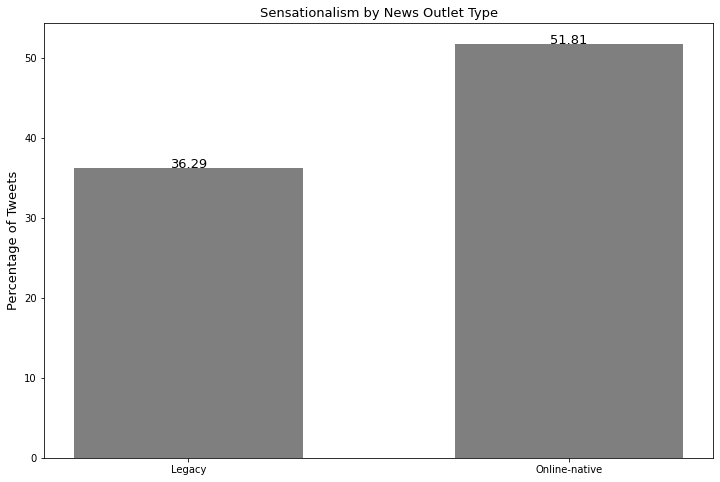

In [92]:
x = np.array(["Legacy", "Online-native"])
y = np.array([36.29,51.81])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontsize=13)
        
plt.figure(figsize=(12,8)) 
        
plt.bar(x,y,color='#7F7F7F', width=0.6)

addlabels(x, y)
     
plt.title("Sensationalism by News Outlet Type", fontsize=13)
     
plt.ylabel("Percentage of Tweets",fontsize=13)


plt.savefig("/Users/salmankhawar/Desktop/Thesis Publication/Paper Revisions/Sensationalism_Outlet_Type.jpg", dpi = 300)



Descriptive Statistics - Topics and Sensationalism (Figure D1)

In [93]:
len(CA_results.loc[(CA_results['politics/government affairs/military'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['politics/government affairs/military'] == 1)])*100

24.587155963302752

In [94]:
len(CA_results.loc[(CA_results['international affairs'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['international affairs'] == 1)])*100

23.076923076923077

In [95]:
len(CA_results.loc[(CA_results['economy/business'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['economy/business'] == 1)])*100

8.333333333333332

In [96]:
len(CA_results.loc[(CA_results['health/education'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['health/education'] == 1)])*100

14.814814814814813

In [97]:
len(CA_results.loc[(CA_results['science/technology'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['science/technology'] == 1)])*100

25.0

In [98]:
len(CA_results.loc[(CA_results['entertainment/celebrity news'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['entertainment/celebrity news'] == 1)])*100

61.37931034482759

In [99]:
len(CA_results.loc[(CA_results['lifestyle and society'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['lifestyle and society'] == 1)])*100

50.847457627118644

In [100]:
len(CA_results.loc[(CA_results['sports'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['sports'] == 1)])*100

70.64220183486239

In [101]:
len(CA_results.loc[(CA_results['crime/law and order'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['crime/law and order'] == 1)])*100

17.5

In [102]:
len(CA_results.loc[(CA_results['human-interest story'] == 1) & (CA_results['combined_features_dummy'] == 1)])/len(CA_results.loc[(CA_results['human-interest story'] == 1)])*100

35.714285714285715

Sensationalism by topic categories (Figure D1)

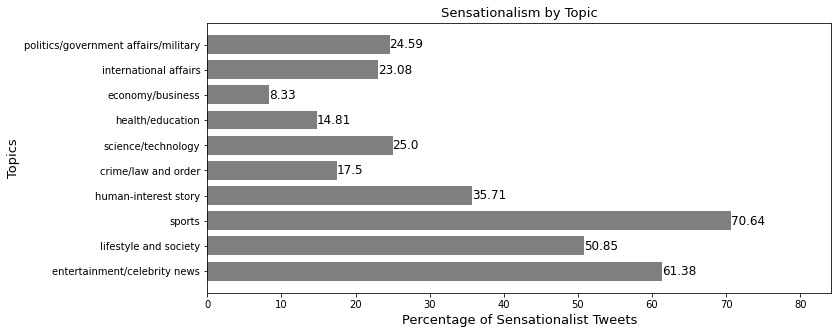

In [103]:
# y-axis
topics =['entertainment/celebrity news','lifestyle and society','sports','human-interest story','crime/law and order','science/technology','health/education','economy/business','international affairs','politics/government affairs/military']

#x-axis
perc_sens=[61.38,50.85,70.64,35.71,17.50,25.00,14.81,8.33,23.08,24.59] 

#horizontal bar chart
fig, ax = plt.subplots(figsize=(12,5))
plt.barh(topics, perc_sens, height=0.75,color='#7F7F7F')

plt.ylabel("Topics",fontsize=13)
plt.xlabel("Percentage of Sensationalist Tweets",fontsize=13) 
plt.title("Sensationalism by Topic",fontsize=13)

_, xmax = plt.xlim()
plt.xlim(0, xmax+10)
for i, v in enumerate(perc_sens):
    plt.text(v, i, str(v), fontsize=12, ha='left', va='center')
#plt.show()
fig.tight_layout(pad=2)
plt.savefig("/Users/salmankhawar/Desktop/Thesis Publication/Paper Revisions/Sensationalism_by_topic.jpg", dpi = 300)


Length of tweets - descriptive statistics

The mean length of tweets in the sample was 109.5 characters.

In [104]:
CA_results['len_tweet'].describe()

count    1440.000000
mean      109.453472
std        50.609879
min         4.000000
25%        74.000000
50%        97.500000
75%       142.000000
max       280.000000
Name: len_tweet, dtype: float64

The mean length of tweets posted by online-native news outlets was 99.5 characters.

In [105]:
CA_results['len_tweet'].loc[(CA_results['outlet_type'] == 1)].describe()

count    720.000000
mean      99.486111
std       39.787472
min        5.000000
25%       72.000000
50%       95.500000
75%      128.000000
max      279.000000
Name: len_tweet, dtype: float64

The mean length of tweets posted by legacy news outlets was 119.4 characters.

In [106]:
CA_results['len_tweet'].loc[(CA_results['outlet_type'] == 0)].describe()

count    720.000000
mean     119.420833
std       57.829632
min        4.000000
25%       76.750000
50%      102.000000
75%      153.250000
max      280.000000
Name: len_tweet, dtype: float64

The mean length of sensationalist tweets in the sample was 109.3 characters.

In [107]:
CA_results['len_tweet'].loc[(CA_results['combined_features_dummy'] == 1)].describe()

count    634.000000
mean     109.324921
std       58.242250
min        4.000000
25%       71.000000
50%       94.000000
75%      137.750000
max      280.000000
Name: len_tweet, dtype: float64

The mean length of non-sensationalist tweets in the sample was 109.6 characters.

In [108]:
CA_results['len_tweet'].loc[(CA_results['combined_features_dummy'] == 0)].describe()

count    806.000000
mean     109.554591
std       43.717630
min        5.000000
25%       77.000000
50%      102.000000
75%      145.000000
max      269.000000
Name: len_tweet, dtype: float64